# Paddock time series clustering STEP 2

Starting with an array of paddock x variable x time (pvt) and a geo dataframe of polygons

## Setup

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.preprocessing import TimeSeriesResampler

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

from tslearn.clustering import KShape, KernelKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

from dea_tools.temporal import xr_phenology, temporal_statistics
from dea_tools.datahandling import load_ard
from dea_tools.bandindices import calculate_indices
from dea_tools.plotting import display_map, rgb, xr_animation
from dea_tools.dask import create_local_dask_cluster

import cv2 

%matplotlib inline


In [2]:
# Function to check missing data in a pandas df found here: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [3]:
# unique identifier for the run 
stub = 'fm_ndwi_4'
#stub = 'ADAMO'
# location of the cached data sets
data_path = '/home/jovyan/Vegetation Phenology/Files/'

In [18]:
# Read in paddocks
pol = gpd.read_file("package.gpkg")

# Create separate y_pred column
y_pred = pol.y_pred

# Read in cluster centers
cluster_centers = np.loadtxt("cluster_centers.txt").reshape(10, 258 // 1, 1)

# Read in X_train
X_train = np.loadtxt("xtrain.txt").reshape(143,258 // 1,1)

In [5]:
# Read in the array of paddocks by variables (e.g. bands) by time -- the pvt array
pvt = np.load(data_path+stub+'_pvt.npy')

# Read in the time stack of multiband sentinel data including index bands. 
ds = xr.open_dataset(data_path+stub+'_ds.nc')
# caution.. ds object appears a bit differently to in the previous notebook, not sure if it will cause problems.. .

# # read time axis (potentially not needed if loading ds working properly)
# time = pd.read_csv(data_path+stub+'_ds-time.csv',
#                   header = None)[1]


In [59]:
# Function to do everything

# Incomplete!
# Not sure if this is the best way to do the focal cluster vs focal paddock thing...

# Arguments:
# ds = data
# cluster = do you want to include a whole cluster? (1 or 0)
# n = cluster number, or paddock number if cluster = 0
# image = what images do we want to display? (eg. RGB, NDVI)

def make_animation(ds, cluster, n, image):
    if cluster:
        focal_cluster = n
        data = cluster1
    else: 
        focal_paddock = n
    
    # Make animation
    if image == "RGB":
        bands = ['nbart_red', 'nbart_green', 'nbart_blue']
    if image == "NDVI":
        bands = "NDVI"
    
    xr_animation(ds, bands = bands, output_path = "function_animation.mp4", show_gdf = pol, gdf_kwargs = {"edgecolor": "red"}, limit = 5)

## Making animation of RGB images and Paddock Polygons

Exporting animation to cluster1.mp4


  0%|          | 0/282 (0.0 seconds remaining at ? frames/s)

/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/python3.10/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/env/lib/pyth

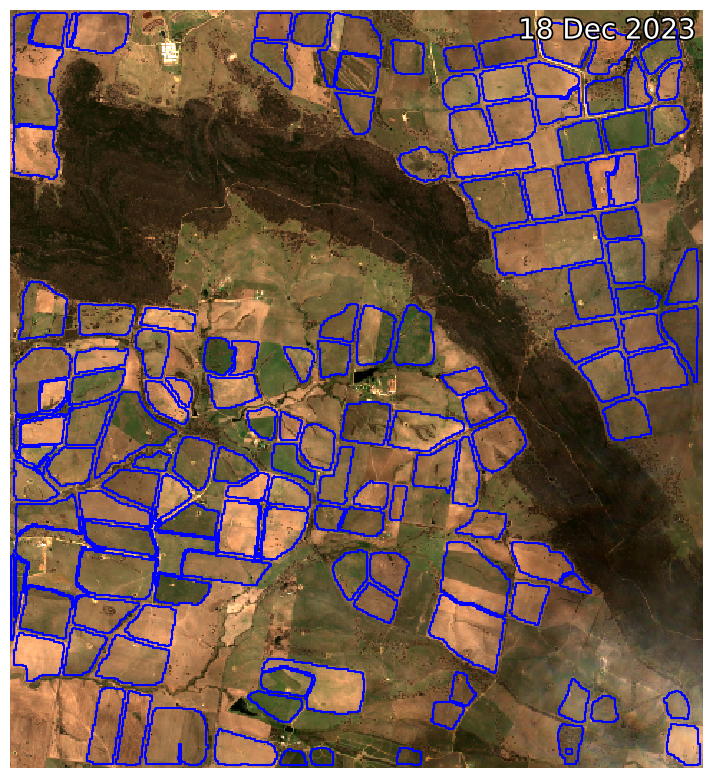

In [71]:
# specify number of frames
num_frames = 10
# Create animation with all the clusters
xr_animation(ds, bands=['nbart_red', 'nbart_green', 'nbart_blue'], output_path = 'animation2.mp4', show_gdf = pol, gdf_kwargs={"edgecolor": "blue"}, limit=num_frames)

In [42]:
# Create animation of cluster 1

pol["color"] = "None"

# Split paddocks by cluster
cluster1 = pol[pol['y_pred'] == 0] 
cluster2 = pol[pol['y_pred'] == 1]
cluster3 = pol[pol['y_pred'] == 2]
cluster4 = pol[pol['y_pred'] == 3]
cluster5 = pol[pol['y_pred'] == 4]
cluster6 = pol[pol['y_pred'] == 5]
cluster7 = pol[pol['y_pred'] == 6]
cluster8 = pol[pol['y_pred'] == 7]
cluster9 = pol[pol['y_pred'] == 8]
cluster10 = pol[pol['y_pred'] == 9]

xr_animation(ds, bands=['nbart_red', 'nbart_green', 'nbart_blue'], output_path = 'cluster1.mp4', show_gdf = cluster1, gdf_kwargs={"edgecolor": "blue"})


Exporting animation to ndvi.mp4


  0%|          | 0/282 (0.0 seconds remaining at ? frames/s)

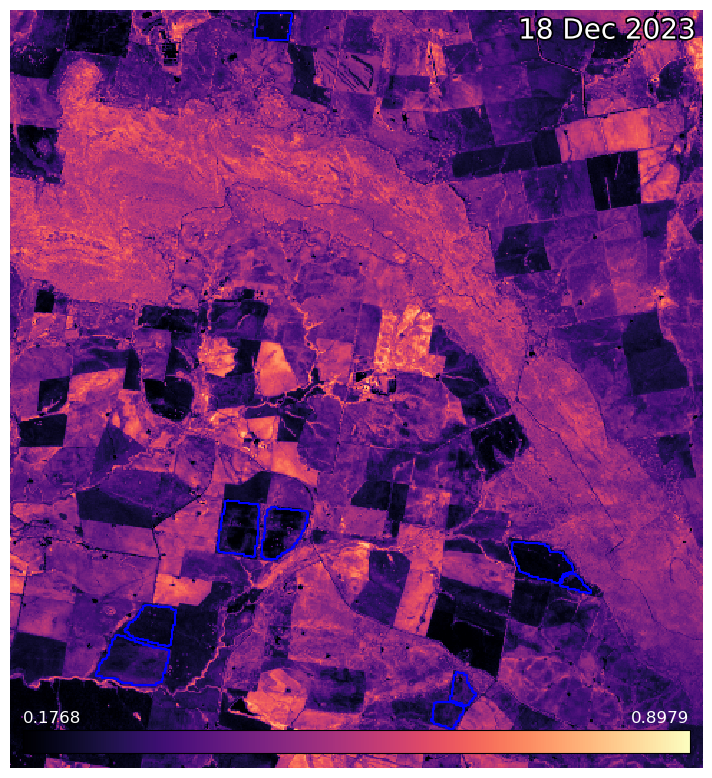

In [43]:
# Make animation using NDVI
# 10 frame limit to test it out

xr_animation(ds_, bands = "NDVI", output_path = 'ndvi.mp4', show_gdf = cluster1, gdf_kwargs={"edgecolor": "red"}, limit = num_frames)

## Converting animation to separate frames

In [75]:
# Function to extract frames 
def FrameCapture(path): 
  
    # Path to video file 
    vidObj = cv2.VideoCapture(path) 
  
    # Used as counter variable 
    count = 0
  
    # checks whether frames were extracted 
    success = 1
  
    while success: 
  
        # vidObj object calls read 
        # function extract frames 
        success, image = vidObj.read() 
  
        # Saves the frames with frame-count 
        cv2.imwrite("cluster1_frames/frame%d.jpg" % count, image) 
  
        count += 1

In [76]:
# Calling the function 
FrameCapture("cluster1.mp4") 

error: OpenCV(4.9.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


## Plotting RGB image alongside NVDI graph

100


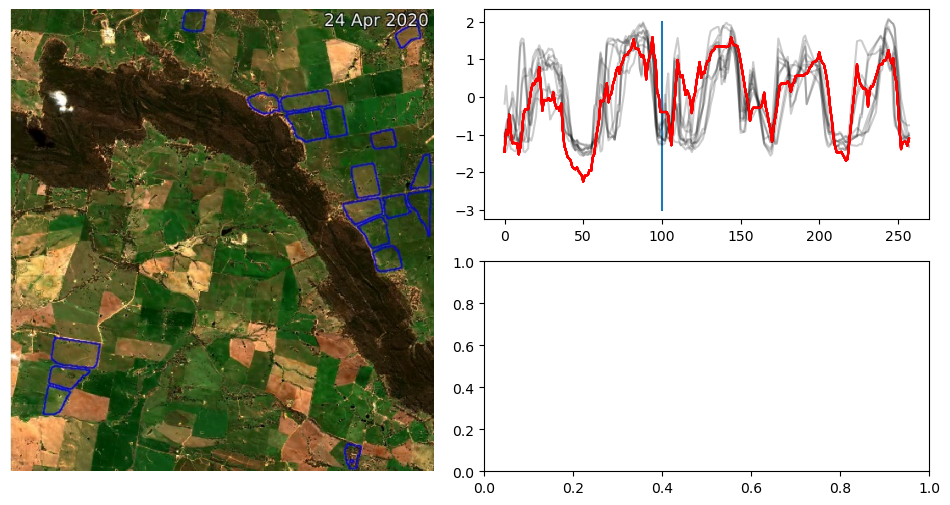

<Figure size 1200x600 with 0 Axes>

In [47]:
# Test single plot

# Which timestep to test?
n = 100

fig = plt.figure(figsize = (12,6))
gs = GridSpec(2,4)
ax1 = fig.add_subplot(gs[:,:2])
ax2 = fig.add_subplot(gs[0,2:])
ax3 = fig.add_subplot(gs[1,2:])

print(n)
# Plot image
img = plt.imread("cluster1_frames/frame%d.jpg" % n)
fig = plt.figure(figsize = (12,6))
ax1.imshow(img)
# Remove axes
ax1.axis('off')
    
# Plot line for current timestep
ax2.plot([n,n],[-3,2])
    
# Plot NDVI
for xx in X_train[y_pred == 0]:
    ax2.plot(xx.ravel(), "k-", alpha=.2)
    ax2.plot(cluster_centers[1].ravel(), "r-")
    
# Save plot
plt.savefig("plot%d.png" % n)
    
# Clear axes
ax1.cla()
ax2.cla()
ax3.cla()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

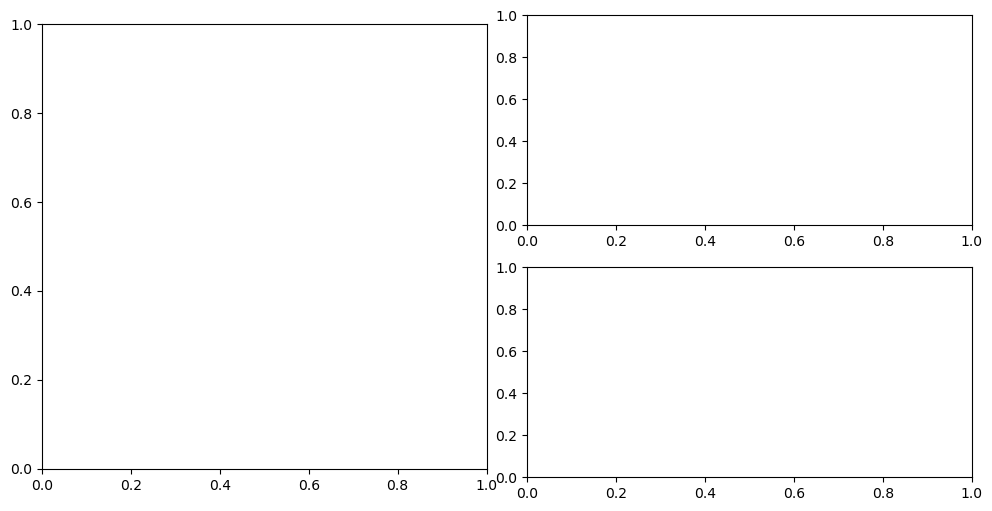

In [50]:
# Loop through all timesteps for Cluster 1 and save plot as jpg
# path: cluster1frames/frame#
# This takes a while to run
# Any ideas of how to make it faster?

cluster1_numframes = 282

fig = plt.figure(figsize = (12,6))
gs = GridSpec(2,4)
ax1 = fig.add_subplot(gs[:,:2])
ax2 = fig.add_subplot(gs[0,2:])
ax3 = fig.add_subplot(gs[1,2:])

for n in range(cluster1_numframes):
    # Plot image
    img = plt.imread("cluster1_frames/frame%d.jpg" % n)
    ax1.imshow(img)
    # Remove axes
    ax1.axis('off')
    
    # Plot line for current timestep
    ax2.plot([n,n],[-3,2])
    
    # Plot NDVI
    for xx in X_train[y_pred == 0]:
        ax2.plot(xx.ravel(), "k-", alpha=.2)
        ax2.plot(cluster_centers[1].ravel(), "r-")
    
    # Save plot
    plt.savefig("cluster1_plots/plot%d.jpg" % n)
    
    # Clear axes
    ax1.cla()
    ax2.cla()
    ax3.cla()


NameError: name 'n' is not defined

In [24]:
# Merge plots into video
# This also takes a little while to run

! ffmpeg -framerate 4 -i cluster1_plots/plot%d.jpg -c:v libx264 -r 30 cluster1_plots.mp4


ffmpeg version 6.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-3)
  configuration: --prefix=/env --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1699837816504/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1699837816504/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1699837816504/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1699837816504/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --

<Figure size 640x480 with 0 Axes>

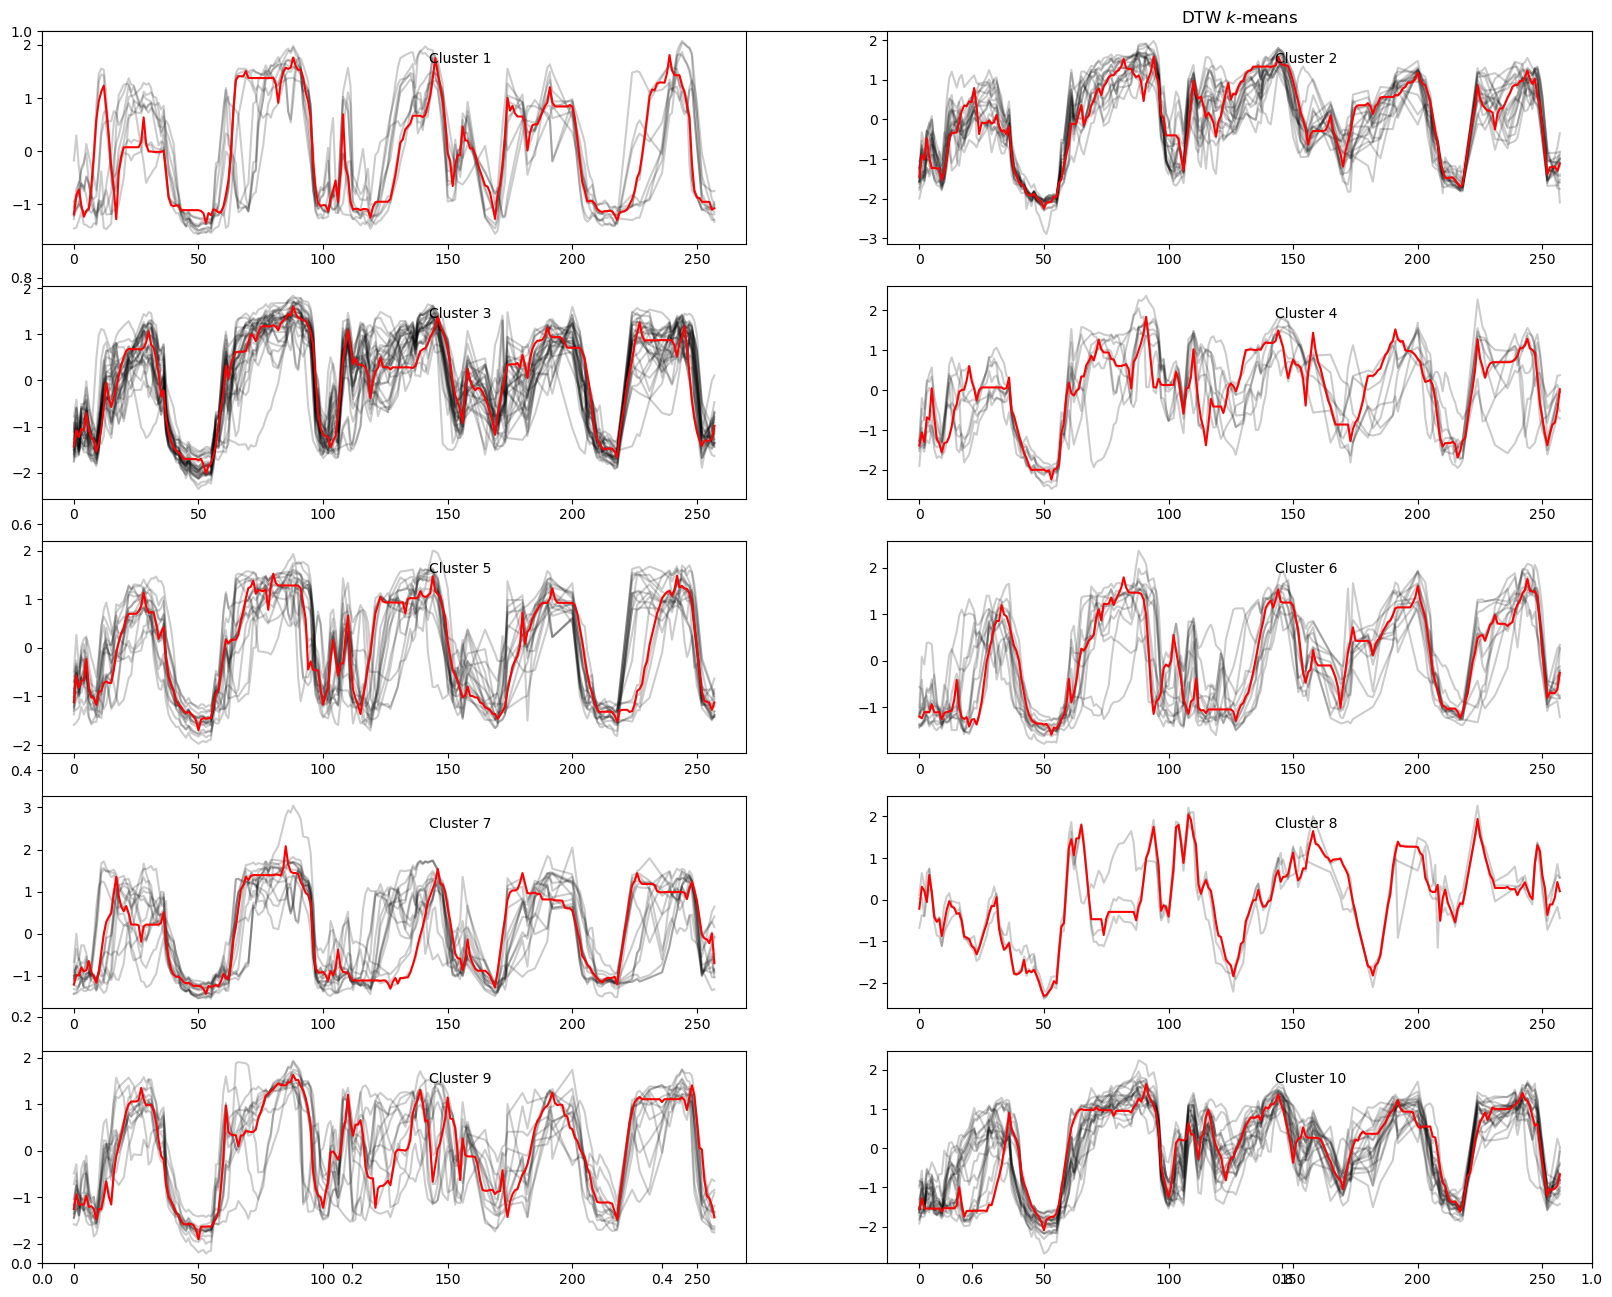

In [158]:
# Plot all clusters

# N_CLUSTERS = 10

plt.figure()
plt.subplots(figsize = (20, 16))
for yi in range(N_CLUSTERS):
    plt.subplot(5, 2, yi + 1) # make sure the n_rows and n_cols multiply to get approx N_CLUSTERS
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(cluster_centers[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

## Check the data before starting time series analyses:

In [9]:
# check out locations of the paddocks:
pol.explore(column='paddock')

number of missing pixels across all ndvi ts : 59


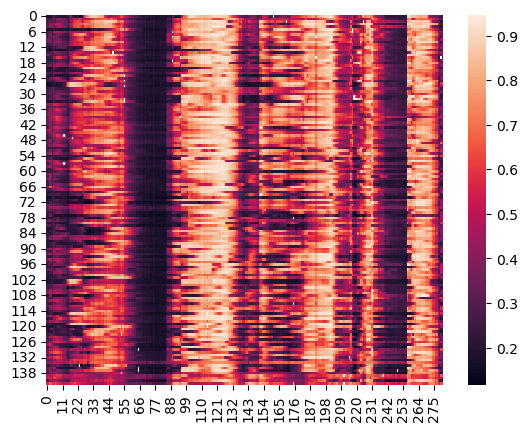

In [10]:
# get array into paddock-time-variable (ptv)

ptv = np.rollaxis(pvt, axis = 1, start = 3)

# check ndvi time series for all paddocks
pt_ndvi = ptv[:,:,4]
sns.heatmap(pt_ndvi)

print('number of missing pixels across all ndvi ts :', np.count_nonzero(np.isnan(pt_ndvi)))


## Time series analyses

In [11]:
# following tslearn and the sklearn kits, get the data into a pandas dataframe with column for datetime and a column for each paddock:

pads = list(pol.paddock)
df = pd.DataFrame(pt_ndvi.T,
                 columns = pads)

# check missing data:
#print(missing_values_table(df))

df = df.interpolate(method = 'linear', axis = 'columns')
df

df.insert(loc=0, column='datetime', value = ds.time.values)
df.shape

(282, 144)

In [12]:
### Resample the pandas df to weekly time series and select a single year. 

def get_weekly(df, interval, start, stop, interpolate = True):
    
    '''resample the time series to an equal window (take median) for nice annual periodicity, 
    truncate to a specific time interval for potentially easier clustering,
    interpolate over missing time windows
    
    Input: a pandas df with first column datetime and columns for each paddock
    Returns: a new pandas df '''
    
    import datetime 
    datetime.datetime.strptime

    # interval = '7D'
    # start = '2020-01-01'
    # stop = '2021-01-01'
    # interpolate = True

    df_resamp = df[(df['datetime'] > start) & (df['datetime'] < stop)]

    df_resamp = df_resamp.set_index('datetime').resample(interval).median()
    
    before = df_resamp.mean(axis=1).to_frame()

    if interpolate == True:
        df_resamp = df_resamp.interpolate(method = 'linear', axis = 'rows') # Careful. sometimes we're going 3+ weeks without data....
    
    df_resamp['datetime'] = df_resamp.index
    
    after = df_resamp.mean(axis=1).to_frame()    
    
    ba = pd.DataFrame(columns = ['before', 'after'])
    ba['before'] = before
    ba['after'] = after
    ba['datetime'] = ba.index
    
    ax1 = ba.plot(kind='scatter', x='datetime', y='after', color='r')    
    ax2 = ba.plot(kind='scatter', x='datetime', y='before', color='b', ax=ax1)    

    print(ax1 == ax2)  # True
    
    return(df_resamp)

### In future, generate time series plot of the mean NDVI before and after interpolation to show extent and effect of missing data. 


True


/tmp/ipykernel_100/430739002.py:31: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after = df_resamp.mean(axis=1).to_frame()


(258, 144)

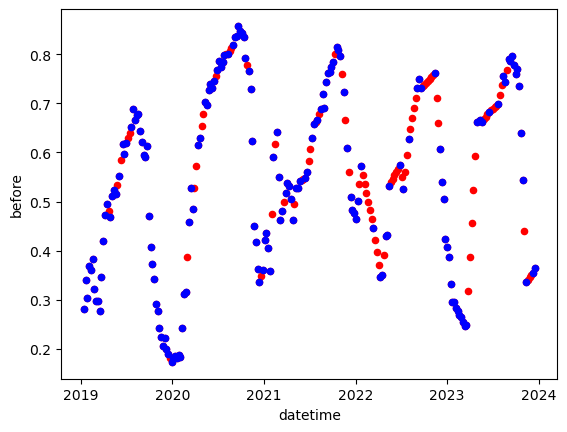

In [13]:
df_ = get_weekly(df, '7D', '2019-01-01', '2024-01-01', interpolate = True)
df_.shape

In [14]:
# interpolate didn't work properly.. there are still nans. 

df_ = df_.dropna(axis = 0)
df_.shape

(258, 144)

In [15]:
df.mean(axis=1)

/tmp/ipykernel_100/3676274908.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean(axis=1)


0      0.275010
1      0.285777
2      0.339206
3      0.339472
4      0.303476
         ...   
277    0.547416
278    0.358368
279    0.313364
280    0.355089
281    0.364060
Length: 282, dtype: float32

In [18]:
X = df_.T.drop('datetime')

# Normalization
X_train = TimeSeriesScalerMeanVariance().fit_transform(X) # transform or not?


In [19]:
missing_values_table(X)

# X can't have ANY missing values..

Your selected dataframe has 258 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

### Don't run boxes below

In [239]:
# From here:
# https://levelup.gitconnected.com/unveiling-patterns-in-time-a-guide-to-time-series-clustering-with-tslearn-50a2ff305afe

# Set a seed for reproducibility
seed = 0
np.random.seed(seed)

# Set the number of clusters
n_clusters = 4

# from tslearn.datasets import CachedDatasets
# X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace") 

# # Resampling: Make time series shorter
# X_train = TimeSeriesResampler(sz=50).fit_transform(X)

# Normalization
X_train = TimeSeriesScalerMeanVariance().fit_transform(X) # transform or not?


#X_train = TimeSeriesScalerMeanVariance().fit_transform(X) # transform or not?

# TimeSeriesKMeans with DTW
model = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True,metric="dtw")

# much faster with euclidian than dtw clustering.. 

In [ ]:
# Visualizing the clustering results
plt.figure(figsize=(9, 8))
for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()


In [24]:
# Set a seed for reproducibility
seed = 0
np.random.seed(seed)
# Set the number of clusters
n_clusters = 10
# from tslearn.datasets import CachedDatasets
# X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")


# # Resampling: Make time series shorter
# X_train = TimeSeriesResampler(sz=50).fit_transform(X_train)

# # Normalization
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# clustering algorithms
clustering_algorithms = {
    "KMeans": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10, n_init=2, n_jobs=-1),
    'dtw': TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=5, n_init=2 , n_jobs=-1),
    'softdtw':TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", max_iter=5, n_init=2, n_jobs=-1),
    'kshape':KShape(n_clusters=n_clusters, max_iter=10, n_init=2),
    'kernelkmeans':KernelKMeans(n_clusters=n_clusters, kernel="gak", max_iter=5, n_init=2, n_jobs=-1),
}

best_algorithm = None
best_score = float("-inf")

# Iterate through each clustering algorithm
for algorithm_name, algorithm in clustering_algorithms.items():
    # Apply the current clustering algorithm
    y_pred = algorithm.fit_predict(X_train)
    # Evaluate the clustering performance using silhouette score
    score = silhouette_score(X_train, y_pred)

    print(f"{algorithm_name} - Silhouette Score: {score}")

    # Check if the current algorithm has a higher silhouette score
    if score > best_score:
        best_score = score
        best_algorithm = algorithm_name

# Print the best clustering algorithm
print(f"The best clustering algorithm is: {best_algorithm} with Silhouette Score: {best_score}")

KMeans - Silhouette Score: 0.06165520345694161
dtw - Silhouette Score: 0.12445537015814996


KeyboardInterrupt: 

 k: 2 	 Inertia: 6.3588049385851235 	 Silhouette Score: 0.23790370354628199
 k: 6 	 Inertia: 4.92719709178444 	 Silhouette Score: 0.1892805232143356
 k: 10 	 Inertia: 3.927153772383165 	 Silhouette Score: 0.12475234799396313
 k: 14 	 Inertia: 3.602881021921826 	 Silhouette Score: 0.12087716884166262
 k: 18 	 Inertia: 3.1128324840622015 	 Silhouette Score: 0.13633567947425007
 k: 22 	 Inertia: 2.945486521403194 	 Silhouette Score: 0.13521524334429777
 k: 26 	 Inertia: 2.66296917727999 	 Silhouette Score: 0.12888832935708547
 k: 30 	 Inertia: 2.4126038327795136 	 Silhouette Score: 0.14242172210425416
 k: 34 	 Inertia: 2.2352069842133044 	 Silhouette Score: 0.1293404269058519


<Axes: xlabel='clusters'>

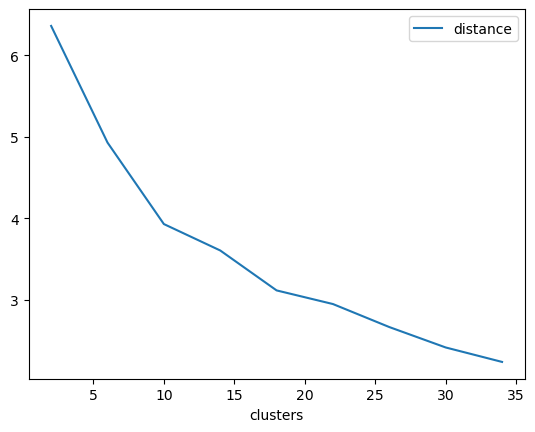

In [31]:
## k--means clustering
# determine number of clusters using the elbow method:

elbow_data = []
for n_clusters in range (2,35,4):
#     train_ts = train['u_in'].values.reshape(-1, 80)
#     y = train['pressure'].values
#     test_ts = test['u_in'].values.reshape(-1, 80)

#     X_train = train_ts[:1000] # using only first 1.000 as a sample

    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1, metric = 'dtw')
    y_pred = km.fit_predict(X_train)
    
    elbow_data.append((n_clusters, km.inertia_))
    
    score = silhouette_score(X_train, y_pred)
    
    print(f' k: {n_clusters} \t Inertia: {km.inertia_} \t Silhouette Score: {score}')

pd.DataFrame(elbow_data,columns=['clusters', 'distance']).plot(x='clusters',y='distance')


### Start again here

### Clustering Model
#### (Not needed, all necessary objects have been saved)

In [ ]:
# NOT NEEDED

# Read in the polygons
pol = gpd.read_file(data_path+stub+'_filt.gpkg')

# have to set a paddock id. Preferably do this in earlier step in future... 
pol['paddock'] = range(1,len(pol)+1)
pol['paddock'] = pol.paddock.astype('category')

In [22]:
# Euclidean k-means
km = TimeSeriesKMeans(n_clusters=N_CLUSTERS, verbose=False, random_state=42,n_jobs=-1, metric = 'dtw')
y_pred = km.fit_predict(X_train)

In [37]:
# Save Cluster Centers array
cc = km.cluster_centers_

# reshaping the array from 3D
# matrice to 2D matrice.
cc_reshaped = cc.reshape(10, -1)
 
# saving reshaped array to file.
np.savetxt("cluster_centers.txt", cc_reshaped)

In [41]:
# Save GDF with y_pred colunm
pol['paddock'] = pol['paddock'].astype('int32')
pol['y_pred'] = pol['y_pred'].astype('int32')
pol.to_file("package.gpkg", driver="GPKG")

In [59]:
# Save X_train array
xt_reshaped = X_train.reshape(143,-1)
np.savetxt("xtrain.txt", xt_reshaped)

(143, 258, 1)

In [42]:
# check out spatial clustering patterns:
pol['y_pred'] = y_pred
pol['y_pred'] = pol['y_pred'].astype('category')
pol.explore(column='y_pred')

/env/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


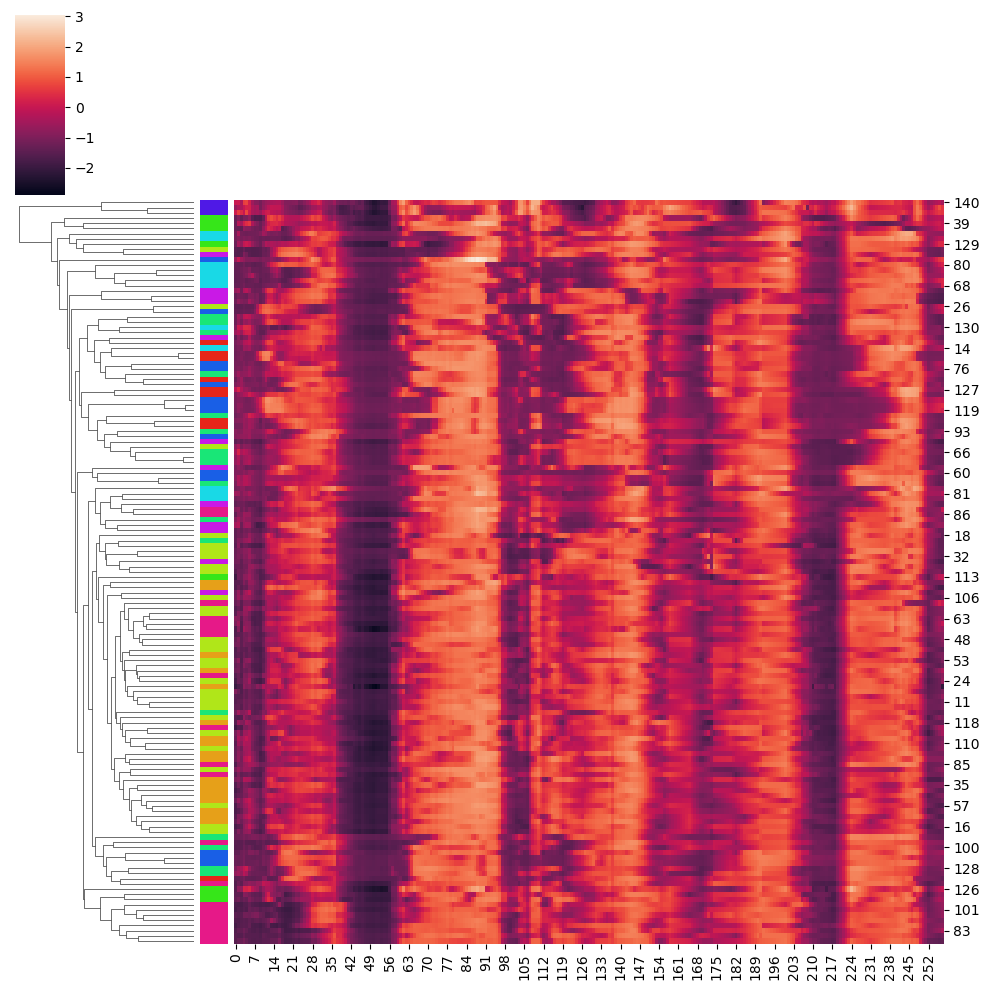

In [43]:
# try clustering without considering temporal info:

# clustermap will group based on euclidiean distance WITHOUT timeseries clustering

# row colors will indicate groupings based on time series clustering.

# plot the 'raw' NDVI values or the fit_transformed?
Xa = X.to_numpy(dtype='float')
Xa = X_train[:,:,0]

lut = dict(zip(set(y_pred), sns.hls_palette(len(set(y_pred)), l=0.5, s=0.8)))
row_colors = pd.DataFrame(y_pred)[0].map(lut)

row_colors
sns.clustermap(Xa,
              row_cluster = True, 
              col_cluster = False,
              method = 'average',
              metric = 'euclidean',
              row_colors = row_colors.to_numpy())

## Notes for next time
- Probably best to resample the time series weekly, then interpolate over missing data. 
- This will the periodicity equal
- For exploratory purposes, might be better to consider years separately. 
- How many clusters best explains the data? try varying k. 
- does it make sense k-means plot to assess structure?
- which clustering method works best? compare sillouette scores
- What about instead of clustering NDVI, look at a function matching NDVI to climate data?
- Maybe try spectral clustering time series in order to consider multiple variables. 